## 🍄 Mushroom Classifier 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('../data/mushrooms.csv')
df.head()
#len(df)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploring Data (EDA)

In [4]:
display(df.shape)
display(df.info())
df.describe(include='object')

(8124, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

None

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

Insights
  - no duplicateds
  - no nulls

# 🍭 Class Distribution

/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/3123188471.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette="rocket")


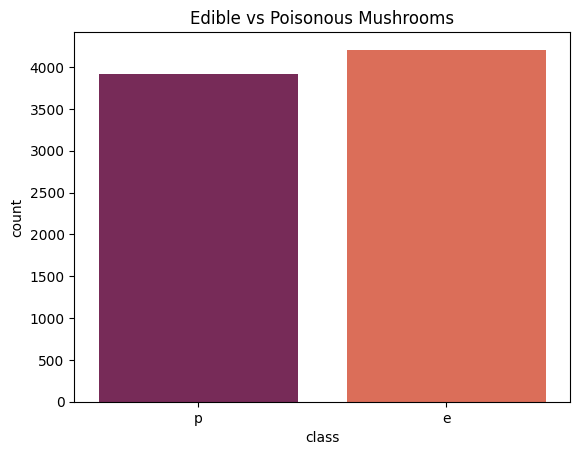

In [7]:
sns.countplot(data=df, x='class', palette="rocket")
plt.title('Edible vs Poisonous Mushrooms')
plt.show()

The data is balanced
51.8% e
48.2% p

In [8]:
counts = df["class"].value_counts()
percent = df["class"].value_counts(normalize=True) * 100

dist = pd.DataFrame({"Count": counts, "Percent": percent.round(2)})
display(dist)

,Count,Percent
class,,
e,4208,51.8
p,3916,48.2


Insights
  - balanced class
  - no need traitements

# 📜 Features 

In [9]:
df.nunique().sort_values(ascending=True)

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/487666125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=uniques.values, y=uniques.index, palette="rocket")


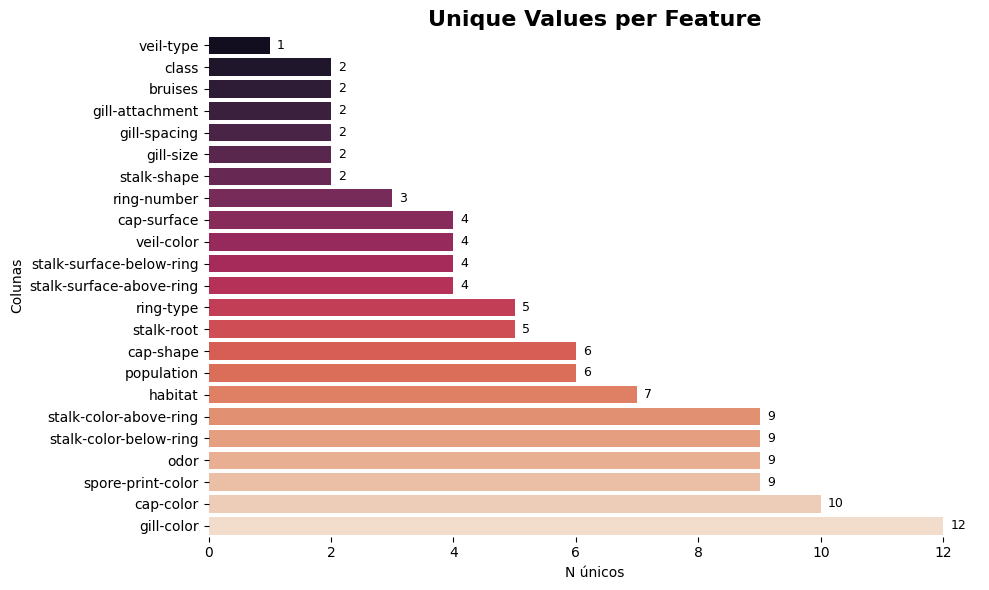

In [10]:
uniques = df.nunique().sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=uniques.values, y=uniques.index, palette="rocket")

ax.set_title("Unique Values per Feature", fontsize=16, weight="bold")
ax.set_xlabel("N únicos"); ax.set_ylabel("Colunas")
sns.despine(left=True, bottom=True)

for p in ax.patches:
    w = p.get_width()
    ax.text(w + max(uniques.values)*0.01, p.get_y()+p.get_height()/2,
            f"{int(w)}", va="center", fontsize=9)

plt.tight_layout(); plt.show()

In [11]:
df['veil-type'].value_counts(normalize=True)

veil-type
p    1.0
Name: proportion, dtype: float64

In [12]:
df.drop(columns=['veil-type'], inplace=True)

In [13]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

Insights
  - the veil-type is a constant feature throughout the data it has a single value and no has predictive power. Desnecessary Feature

/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/857417656.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/857417656.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/857417656.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/857417656.py:14: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipy

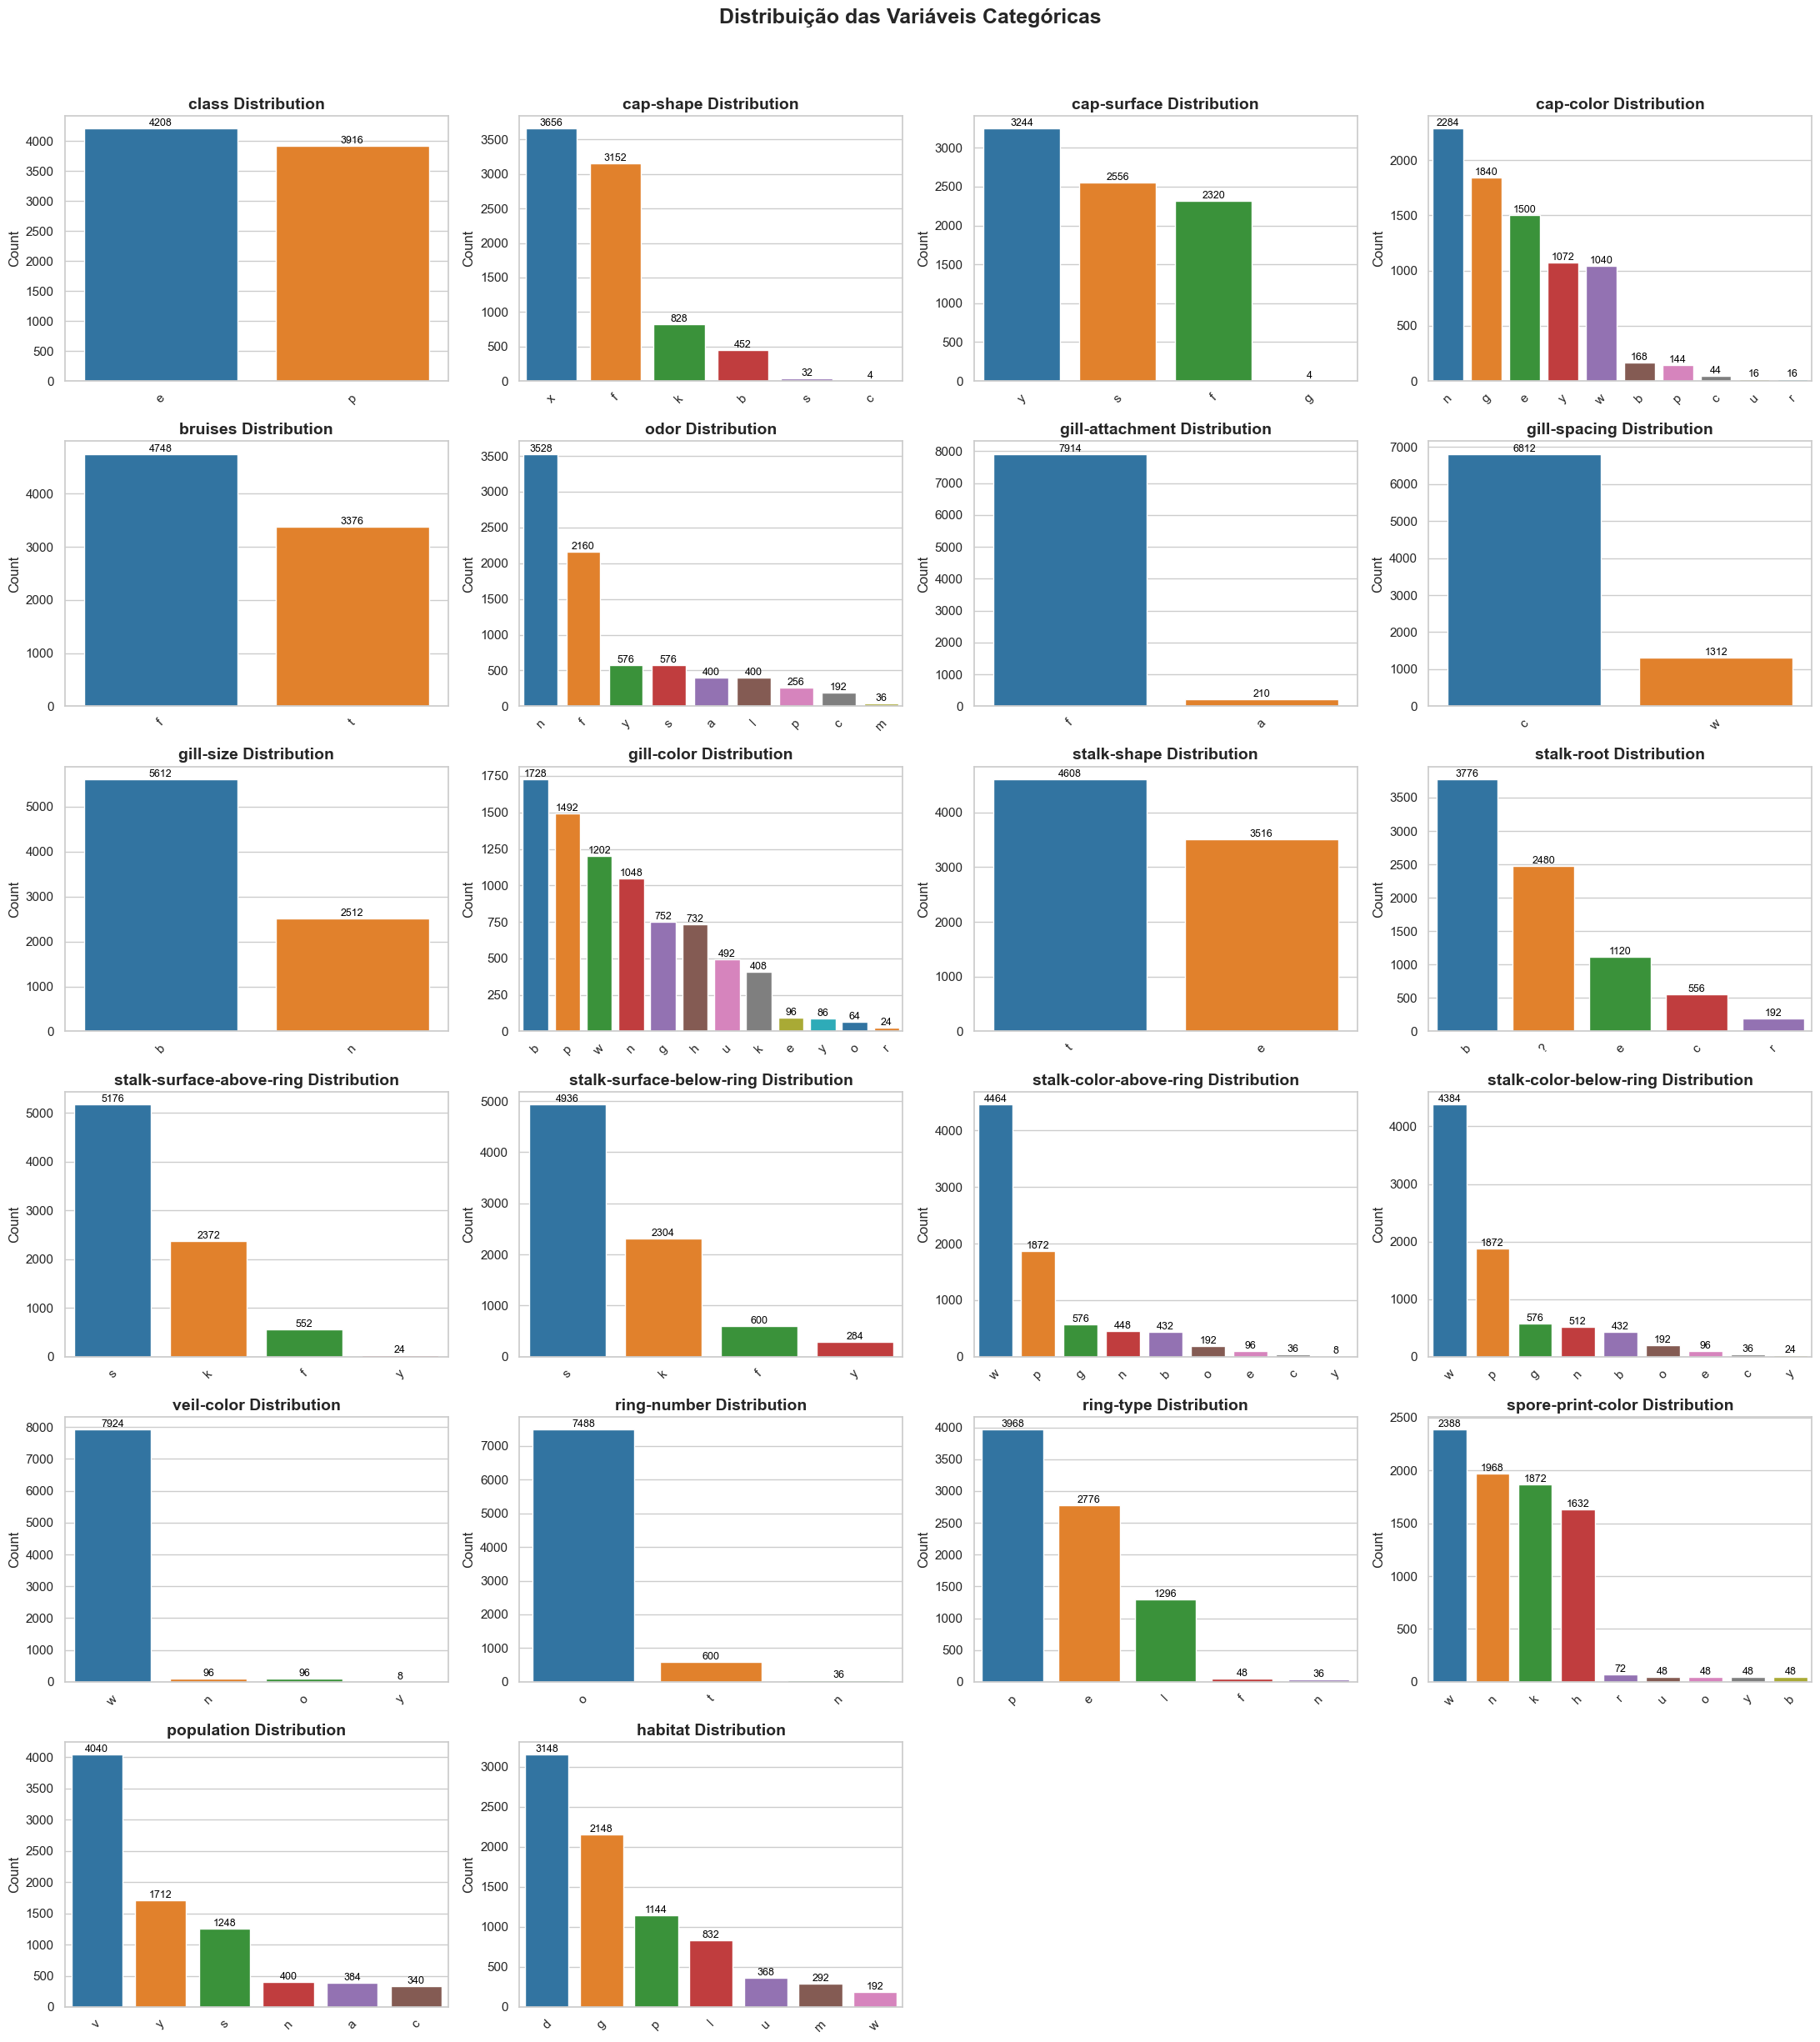

In [14]:
cat_cols = df.columns.tolist()

n_cols = 4
n_rows = math.ceil(len(cat_cols) / n_cols)


sns.set_theme(style="whitegrid")
palette = sns.color_palette("tab10")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=df, 
        x=col, 
        ax=axes[i], 
        order=df[col].value_counts().index,
        palette=palette
    )
    
    axes[i].set_title(f'{col} Distribution', fontsize=14, weight="bold")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel("")  # tira label redundante
    axes[i].set_ylabel("Count")

    # Adicionar valores nas barras
    for p in axes[i].patches:
        axes[i].annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=9, color='black'
        )

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuste de layout
plt.suptitle("Distribuição das Variáveis Categóricas", fontsize=18, weight="bold", y=1.02)
plt.tight_layout()
plt.show()


In [15]:
features = [col for col in df.columns if col != 'class']

summary_tables = {}

for col in features:

    freq_table = df.groupby([col,'class']).size().unstack(fill_value = 0)
    summary_tables[col] = freq_table
    print(f"\nFeature: {col}")
    print(freq_table)


Feature: cap-shape
class         e     p
cap-shape            
b           404    48
c             0     4
f          1596  1556
k           228   600
s            32     0
x          1948  1708

Feature: cap-surface
class           e     p
cap-surface            
f            1560   760
g               0     4
s            1144  1412
y            1504  1740

Feature: cap-color
class         e     p
cap-color            
b            48   120
c            32    12
e           624   876
g          1032   808
n          1264  1020
p            56    88
r            16     0
u            16     0
w           720   320
y           400   672

Feature: bruises
class       e     p
bruises            
f        1456  3292
t        2752   624

Feature: odor
class     e     p
odor             
a       400     0
c         0   192
f         0  2160
l       400     0
m         0    36
n      3408   120
p         0   256
s         0   576
y         0   576

Feature: gill-attachment
class            

/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/2653010850.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/2653010850.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/2653010850.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/2653010850.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(
/var/folders/sp/_5x27t2s5tv46chr2zywfb4r0000gn/T/ipykernel_1164/2653010850.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(
/var/folde

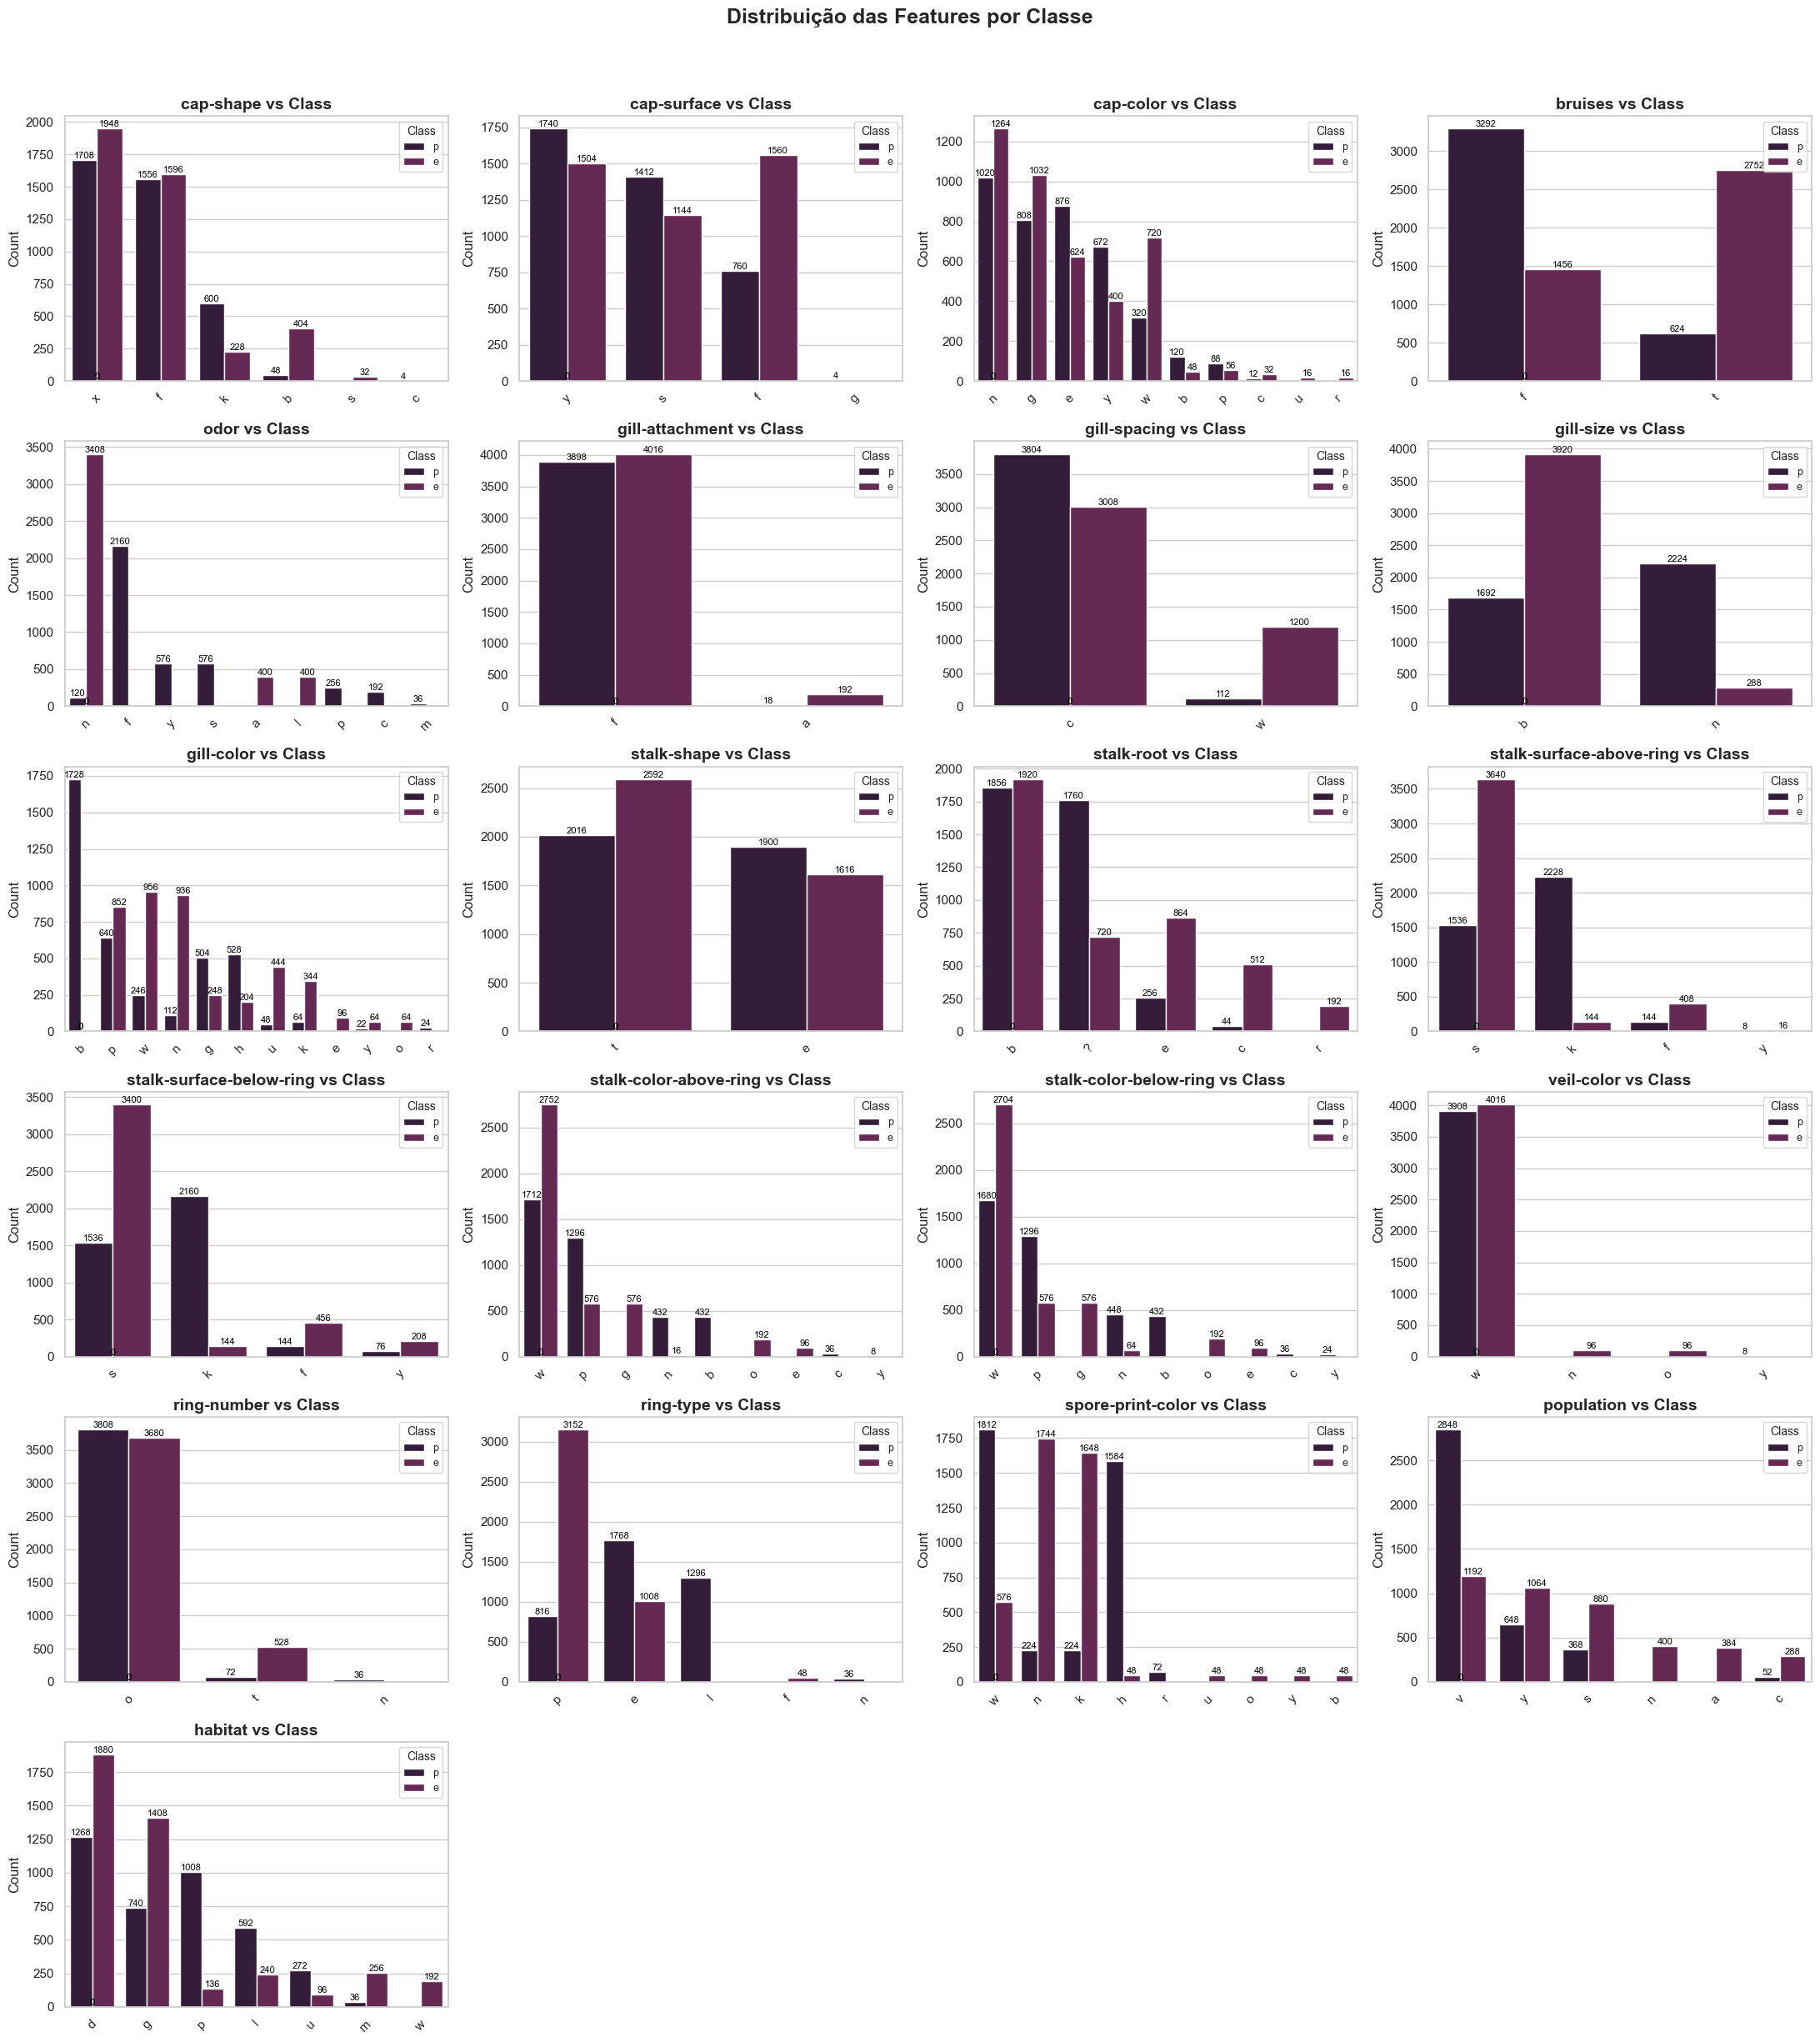

In [16]:
n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

sns.set_theme(style="whitegrid")  # estilo global
palette = sns.color_palette("rocket")  # paleta de cores

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 4))
axes = axes.flatten()

# Plot each feature against class
for i, col in enumerate(features):
    ax = sns.countplot(
        data=df, 
        x=col, 
        hue='class', 
        ax=axes[i], 
        order=df[col].value_counts().index,
        palette=palette
    )
    
    # Título e rótulos
    ax.set_title(f'{col} vs Class', fontsize=14, weight="bold")
    ax.set_xlabel("")  # remove label redundante
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

    # Legenda compacta
    ax.legend(title="Class", loc="upper right", fontsize=9, title_fontsize=10)

    # Adicionar valores nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=8, color='black'
        )

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título geral
plt.suptitle("Distribuição das Features por Classe", fontsize=18, weight="bold", y=1.02)
plt.tight_layout()
plt.show()


Insights
  Dominance:
  - we can see that odor class has a dominance in prediction      because each odor is unique to each class.
    - Edible mushrooms -> n (none) is the most common (3.4k examples)
    - Poisonous mushrooms -> f (foul) is the most common (2.1k examples)

      -  a (almond), l (anise), and n (none) appear only in edible mushrooms 
      - c (creosote), f (foul), m (musty), p (pungent), s (spicy), and y (fishy) appear only in poisonous mushrooms

  - Zero overlap - no odor feature is ambiguity between the two classes

# 🧬 Encoder Selection

Label Encoder

In [17]:
df_Label_encoded = df.apply(LabelEncoder().fit_transform)
corr = df_Label_encoded.corr()['class'].sort_values(ascending=False)
print(corr)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64


Insights:
  - Label Encoding imposes an artificial order among categories, creating non-existent relationships.
    - Example: odor = {"none": 0, "foul": 1, "fishy": 2, "spicy": 3} → suggests a false sequence.

  - One-Hot Encoding treats each category as independent, avoiding misleading correlations.
    - Example: odor_none=1, odor_foul=0, odor_fishy=0, odor_spicy=0 → each odor is unique and separate.

  - In the case of odor, this highlights its true importance as a predictive attribute for classification.


OneHotEncoder

In [18]:
X = df.drop('class', axis=1)
y = df['class']
y = y.map({'e': 0, 'p': 1})

encoder = OneHotEncoder(use_cat_names=True)
X_encoded = encoder.fit_transform(X)


df_encoded = X_encoded.copy()
df_encoded['class'] = y


correlations = df_encoded.corr()['class'].sort_values(ascending=False)
correlations.head(10)

class                         1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
gill-color_b                  0.538808
bruises_f                     0.501530
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
Name: class, dtype: float64

Insights:
  - The results show that odor_foul (r = 0.62) is the strongest indicator of poisonous mushrooms. Other features such as stalk-surface-above-ring_k (r = 0.58) and gill-size_n (r = 0.54) also contribute significantly. Thus, odor emerges as the dominant predictor, with morphological traits providing additional discrimination.

# 🍰 Train Test Split

In [19]:
X = df_encoded.drop(columns = 'class')
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [20]:
X_test.shape

(1625, 116)

# 🧠 Model Logic

In [21]:
lgr = LogisticRegression(max_iter=1000)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

models = {
    "Logistic Regression": lgr,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "Gradient Boosting": gbc
}

for name, model in models.items():
    model.fit(X_train, y_train)
    display(model)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 📈 Evaluate Models

In [22]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

results = {name: evaluate(model, X_test, y_test) for name, model in models.items()}
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting
Accuracy,0.999385,1.0,1.0,0.998769
Precision,1.000000,1.0,1.0,1.000000
Recall,0.998723,1.0,1.0,0.997446
F1 Score,0.999361,1.0,1.0,0.998721


# 🤯 Confusion Matrics display

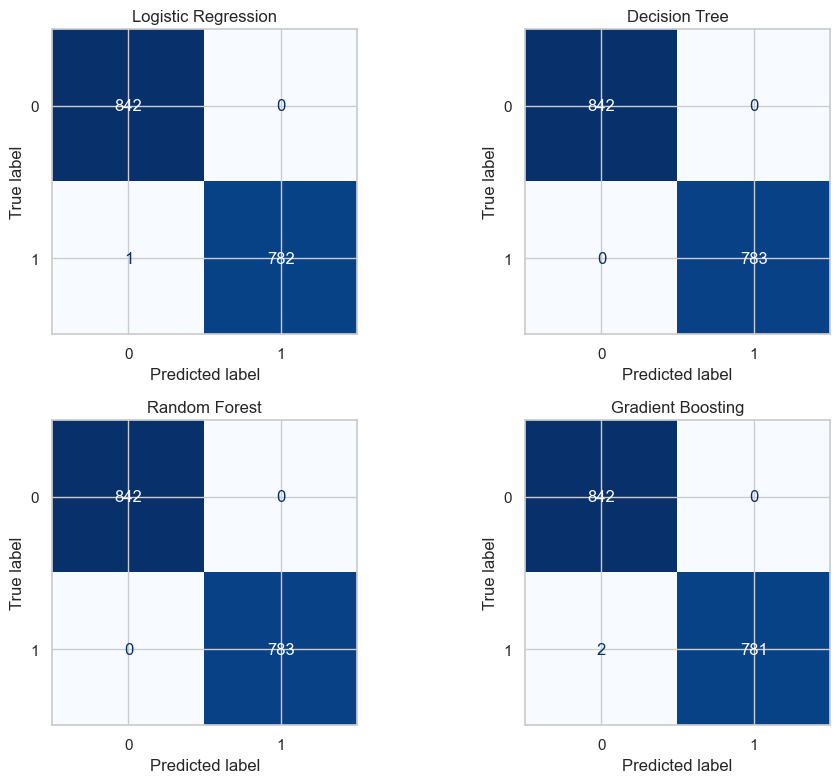

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f"{name}")


plt.tight_layout()

Insights:
  - All models had a great/perfect rating
  - We can observe that tree-based models achieved better performance than Gradient Boosting and Logistic Regression.

  - The near-perfect performance of the models is explained by the dataset’s characteristics: highly predictive features such as odor (e.g., odor_foul occurs only in poisonous mushrooms), absence of class overlap between edible and poisonous classes, and clean, balanced data with no missing values. These factors create ideal conditions for robust classification and explain the consistently high evaluation metrics observed.


# 🔧 Hyperparameter Tuning (Grid Search)

In [ ]:
param_logreg = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_logreg, cv=5,n_jobs = -1, verbose = 1)

param_dtree = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dtree, cv=5,n_jobs = -1, verbose = 1)

param_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5,n_jobs = -1, verbose = 1)

param_gb = {'n_estimators': range(20, 31, 5), 'max_depth': range(2, 5)}
grid_gb =  GridSearchCV(GradientBoostingClassifier(), param_grid = param_gb, cv = 5, n_jobs = -1, verbose = 1)

grids = {'Logistic Regression': grid_logreg,
         'Decision Tree': grid_dtree,
         'Random Forest': grid_rf, 
         'Gradient Boosting': grid_gb}

for name, grid in grids.items():
    grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


# 🏁 Final Evaluation and Model Selection

In [25]:
best_models = {name: grid.best_estimator_ for name, grid in grids.items()}
final_results = {name: evaluate(model, X_test, y_test) for name, model in best_models.items()}
final_results = pd.DataFrame(final_results)
final_results

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting
Accuracy,0.999385,1.0,1.0,0.998769
Precision,1.000000,1.0,1.0,1.000000
Recall,0.998723,1.0,1.0,0.997446
F1 Score,0.999361,1.0,1.0,0.998721


Insights:
  - Decision Tree and Random Forest all perfect classifield every mushroom in the test set
  - Logistic Regression and Gradient Boosting made a few minor errors, like 1 or two.
  - Slight drop in Recall means it missed a few poisonouns, that is a risk.

  Random Forest: Robust, fast, interpretable via feature importances, and handles categorical data well.
  
  Logistic Regression: Lightweight, interpretable, and surprisingly effective here due to strong feature separation.

  Decision Tree might still perform well, but it’s less stable, less generalizable, and more prone to overfitting